In [1]:
# %matplotlib widget
import numpy as np 
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
import os
import sys
import importlib



sys.path.append('/Users/zacharykelly/Documents/MATLAB/projects/combiExperiments/code/lightLogger/miniSpect')
sys.path.append('/Users/zacharykelly/Documents/MATLAB/projects/combiExperiments/code/lightLogger/camera')
import Camera_util
import MS_util

In [11]:
# Define macro information about where to find the directories/files for all of the data
path_to_ssd: str = '/Volumes/EXTERNAL1'         
experiment_name: str = 'battery_5hz_0NDF'
frequency: float = 5
NDF: int = 0

In [12]:
# Define paths to individual sensor readings
#world_cam_dir: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_world')
world_cam_dir: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_world')
pupil_cam_dir: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_pupil')
sunglasses_file: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_sunglasses.txt')
MS_readings_dir: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_MS_readings')
frame_capture_time_file: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_world_frameTimings.csv')
#CPU_info_file: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_world_cpuInfo.csv')

#frame_capture_time_file: str = '/Volumes/EXTERNAL1/test_cam_only_5mins/test_cam_only_5mins_frameTimings.csv'


#assert(all(os.path.exists(path) == True for path in [world_cam_dir, pupil_cam_dir, MS_readings_dir, sunglasses_file]))

In [14]:
whole_video = Camera_util.parse_mean_frame_array_buffer(world_cam_dir)

NameError: name 'parse_mean_frame_array_buffer' is not defined

Analyzing chunk 1/7 with size: 60 buffers/seconds...
BEFORE INTERPOLATION
Observed FPS: 200.18
R2: 0.34893369151277037
Amplitude: 0.15943287346078103
Timestamps of Potentially Dropped Frames
     Start | End
    0.1399    0.1449
    0.4896    0.4946
    0.5395    0.5445
    0.7393    0.7443
    0.9392    0.9442
    1.2888    1.2938
    1.3388    1.3438
    1.4887    1.4937
    1.5386    1.5436
    1.7384    1.7434
    1.9383    1.9433
    1.9433    1.9482
    2.0831    2.0881
    2.1381    2.1431
    2.2879    2.2929
    2.3379    2.3429
    2.4878    2.4928
    2.5377    2.5427
    2.9374    2.9424
    3.0872    3.0922
    3.1372    3.1422
    3.2870    3.2920
    3.7366    3.7416
    3.8865    3.8915
    3.9365    3.9415
    4.0863    4.0913
    4.2811    4.2861
    4.7307    4.7357
    4.9356    4.9406
    5.1304    5.1354
    5.2802    5.2852
    5.3302    5.3352
    5.5300    5.5350
    5.7298    5.7348
    5.9297    5.9347
    6.0795    6.0845
    6.1245    6.1295
    6.2744    6

AttributeError: 'NoneType' object has no attribute 'addpath'

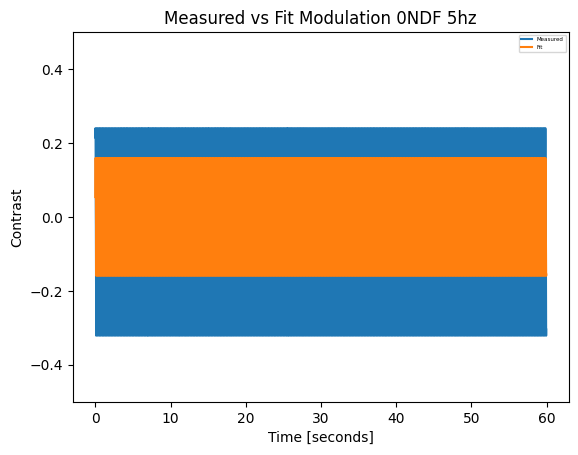

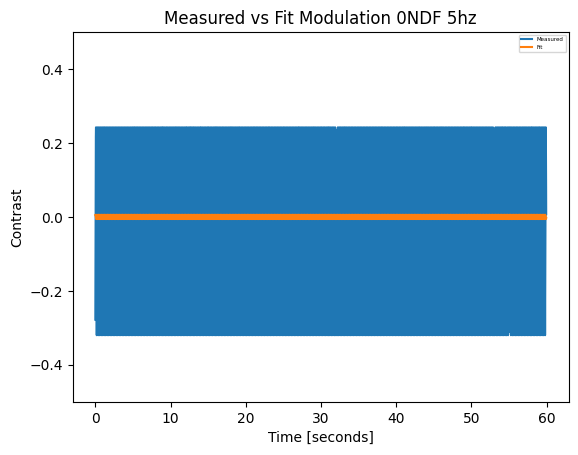

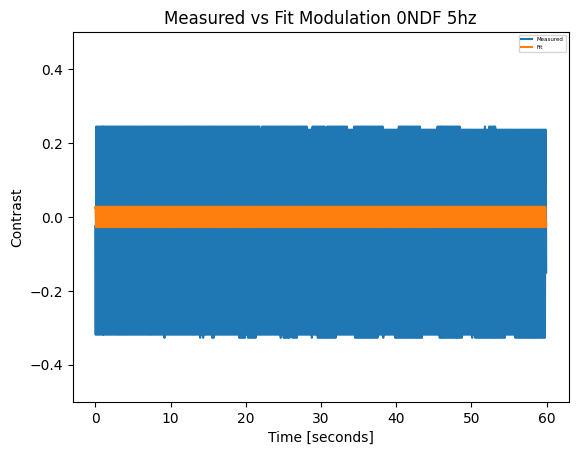

In [13]:
# Examine the world cam data 
sys.path.append('/Users/zacharykelly/Documents/MATLAB/projects/combiExperiments/code/lightLogger/camera') # append the path to the camera libraries so we can use their files
import recorder     
import Camera_util

importlib.reload(Camera_util)

# Define the chunksize of time to analyze at a given time 
chunk_seconds: int = 60 # Look at one minute chunks

# Load in the paths20 to the 1-second buffer files 
buffer_files: list = [os.path.join(world_cam_dir, file) 
                     for file in natsorted(os.listdir(world_cam_dir))]

# Define the chunks
chunks: list = [buffer_files[i:i+chunk_seconds] 
               for i in range(0, len(buffer_files), chunk_seconds)]

# Initialize a container for the fit info for each chunk 
r2_values: list = []
amplitudes: list = []
phases: list = []
fpss: list = []

# Retrieve a list of the fi%matplotlib widgetts of the observed modulations
fits: list = []

# Iterate over the chunks
for chunk_idx, chunk in enumerate(chunks):
    print(f'Analyzing chunk {chunk_idx+1}/{len(chunks)} with size: {len(chunk)} buffers/seconds...')

    # Load in the frames from this chunk
    chunk_frames: np.ndarray = Camera_util.parse_mean_frame_array_buffer(chunk)

    # Initialize an axis to display the fit on 
    fig, ax = plt.subplots(1,1)

    # Fit the modulation for this chunk (Without interpolation)
    print('BEFORE INTERPOLATION')
    ret_info: tuple = Camera_util.fit_source_modulation(chunk_frames, str(NDF), frequency, ax=ax, fps_guess=200.18, fps_guess_increment=(0,0), convert_to_contrast=True)

    # Extract the signal and fit 
    signal_t, signal, model_t, fit = ret_info[-1][:4]

    # Then, recall it with interpolation
    threshold = np.percentile(np.abs(np.diff(signal)), 99.99)
    interpolated_signal, interpolated_signal_T = Camera_util.interpolate_signal(signal, signal_t, fit, model_t, threshold, 200.18)

    print('AFTER INTERPOLATION')
    ret_info: tuple = Camera_util.fit_source_modulation(interpolated_signal, str(NDF), frequency, fps_guess=200.18, fps_guess_increment=(0,0))

    # Retrieve the amplitude and phase for the fit 
    amplitude, phase, observed_fps = ret_info[:3]

    # Retrieve the R2 from the ret information
    #r2: float = ret_info[-1][-1] 

    # Append the info to the running lists of info 
    #r2_values.append(r2)
    #amplitudes.append(amplitude)
    #phases.append(phase)
    #fits.append(ret_info[-1][:-1])
    #fpss.append(observed_fps)

    # Show the fit
    #plt.show()

    # Close the figure
    #plt.close(fig)



In [ ]:
# Plot the R2, amplitudes, and phase by buffer 
# in both log and non-log scale
fig, axes = plt.subplots(4,2, figsize=(16,10))

# Keep track of what axis we are on 
ax_num: int = 0 

# Iterate over the measurements with their associated axes and plot them
for i, (measurement, name, ax_row) in enumerate(zip((r2_values, amplitudes, phases, fpss), ('R2', 'Amplitude', 'Phase', 'FPS'), axes)):
    # Retrieve the base 10 ax to plot on 
    # and the log ax 
    ax: plt.Axes = ax_row[0]
    log_ax: axes = ax_row[1]

    # Title the graphs
    ax.set_title(name)
    log_ax.set_title(f'{name} LOG')

    # Label the X axes 
    ax.set_xlabel('Chunk Number')
    log_ax.set_xlabel('Chunk Number')


    # Label the Y axes
    ax.set_ylabel('Value')
    log_ax.set_ylabel('Value [LOG]')

    # Plot the data 
    ax.plot(measurement)
    log_ax.plot(np.log10(measurement))


    # Update the ax num
    ax_num += 2 
    
# Adjust the spacing in the plot
plt.subplots_adjust(wspace=0.5, hspace=1)

# Show the plot
plt.show()

In [ ]:
avg_r2_100, median_r2_100 = np.mean(r2_values), np.median(r2_values)

print(avg_r2_100)
print(median_r2_100)

In [ ]:
avg_r2_30, median_r2_30 = np.mean(r2_values), np.median(r2_values)

print(avg_r2_30)
print(median_r2_30)